In [ ]:
#sito:https://www.aidancooper.co.uk/supervised-clustering-shap-values/
# Supervised Clustering: How to Use SHAP Values for Better Cluster Analysis,2022

In [ ]:
!pip install shap

In [ ]:
import lightgbm as lgb
import shap
from sklearn.datasets import make_classification

# simulate raw data
X, y = make_classification(
    n_samples=1000,
    n_features=50,
    n_informative=5,
    n_classes=2,
    n_clusters_per_class=3,
    shuffle=False
)

# fit a GBT model to the data
m = lgb.LGBMClassifier()
m.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(m)
shap_values = explainer(X)


In [ ]:
!pip install umap-learn

In [4]:
from umap import UMAP


# compute 2D embedding of SHAP values
s_2d = UMAP(
  n_components=2, n_neighbors=200, min_dist=0
).fit_transform(shap_values.values[:, :, 1])


In [5]:
from sklearn.cluster import DBSCAN

# Identify clusters using DBSCAN
s_labels = DBSCAN(eps=1.5, min_samples=20).fit(s_2d).labels_

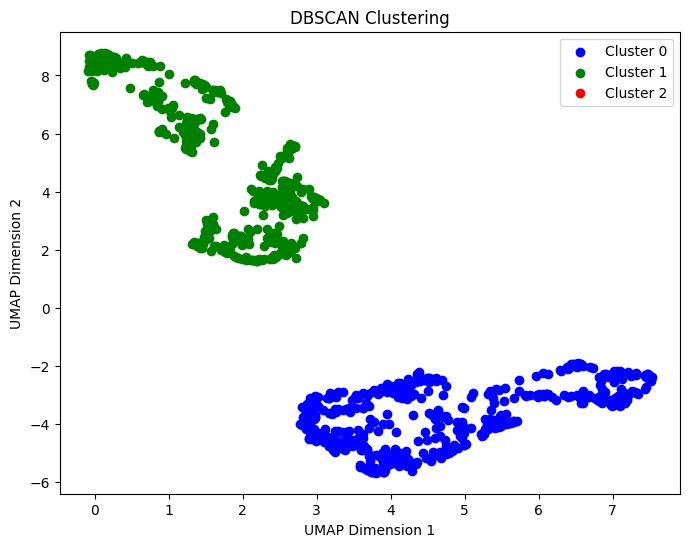

In [6]:
import matplotlib.pyplot as plt

# Definisci i colori per i cluster, includendo anche il rumore (cluster -1)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# Numero di cluster, considerando anche il rumore
n_clusters = len(set(s_labels)) - (1 if -1 in s_labels else 0)

# Crea il grafico
plt.figure(figsize=(8, 6))

# Itera sui cluster e plotta i punti dati per ciascun cluster
for i in range(n_clusters + 1):
    # Seleziona i punti dati appartenenti al cluster attuale
    cluster_points = s_2d[s_labels == i]

    # Plotta i punti dati per il cluster attuale
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}' if i != -1 else 'Noise')

# Imposta le etichette degli assi e il titolo
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('DBSCAN Clustering')

# Mostra la legenda
plt.legend()

# Mostra il grafico
plt.show()